# 평가


*   머신러닝의 기본 프로세스
    * 데이터 가공/변환 -> 모델 학습/예측 -> 평가


*   회귀 모델에서의 평가지표
    * 실제값과 예측값의 오차 평균값에 기반

*  분류 모델에서의 평가지표
    * 정확도
    * 오차행렬
    * 정밀도
    * 재현율
    * F1 스코어
    * ROC AUC

# 정확도
실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

*  정확도(Accuracy) = 예측 결과가 동일한 데이터 건 / 전체 예측 데이터 건수
*  이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기에 여러가지 수치를 고려하여 정확도를 측정함

In [3]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    # fit() 는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass

    # 만약 입력 데이터 X의 'Sex' 특성이 1이면 0을, 그렇지 않으면 1을 예측값으로 합니다.
    def predict(self, X):
        # 입력 데이터 X의 행 개수만큼 0으로 초기화된 배열을 생성. 이 배열은 예측 결과를 저장하기 위한 것.
        pred = np.zeros((X.shape[0], 1))

        # X의 모든 행에 대해서 반복.
        for i in range(X.shape[0]):
            # 만약 현재 행의 'Sex' 값이 1이면, 예측값을 0으로 설정.
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            # 그렇지 않으면, 예측값을 1로 설정.
            else:
                pred[i] = 1

        return pred


In [4]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


*  여성이면 생존, 남성이면 사망의 결과를 내는 로직의 단순한 Classifier 의 정확도는 0.7877로 꽤 높게 나온다. 즉 분류 모델의 정확도를 평가지표를 사용해야 할 때는 매우 신중해야한다.

*  불균형한 레이블 값 분포에서 ML모델의 성능을 평가할 경우, 적합한 평가지표가 아니다.

In [6]:
# MNIST 데이터셋을 multi classification에서 binary classification 으로 변경 (7만true, 나머지는 fasle -> 불균형한 데이터셋으로 변경)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [7]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


모든 예측값을 0으로 해도 정확도가 90%가 나온다. 이처럼 레이블 데이터 분포가 불균형할 경우 정확도를 평가지표를 사용해서는 안된다.


# 오차행렬
*  오차행렬: 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다

![평가지표.JPG](![F1_SCORE.JPG](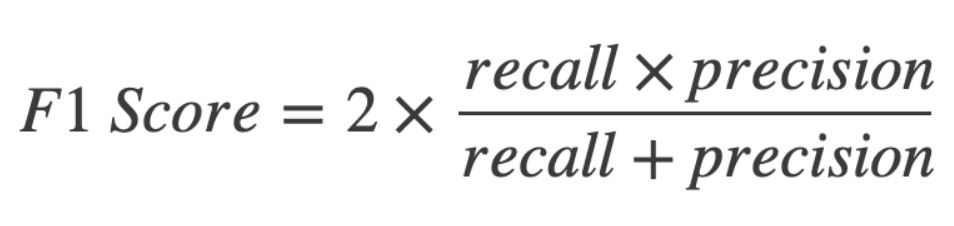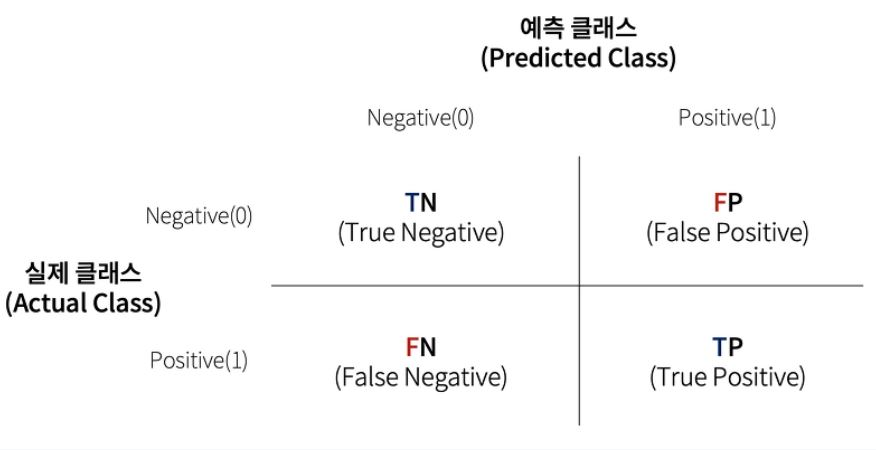)j5+v/aAAwDAQACEQMRAD8A+kaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKMijNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeJeJPHHjrxH461vR/h3Ja29p4eiVrqWZA3nuRnaM/Qj8K9tPSvB/AetWHhH4kfEex164itZWn+1x+a2PMQqW49eCPzoA5vxZ8bl8VeBtFsIZbmw8QpqkP2xIkZEwu5WG7pzleK7f4YXM83xr8bxyzO6LHCVVmyB8q14w+sXknw9SzOiXiWN94qGoQ6kwxCwOQEHv1P4V638OpLiL4vfEGSyiE1yltG0MbHAdwi7Rn3OBQBreO9T8f8Ah2XUNVXxXoGnaPGzNBHcwAybey9Pmb2ryf4P+IvGd1JeaVoniXTNPuJpfOWHUotzTZ7pnt7Vpy+DtX/4SGXUtT8BabeXRlMnl3uqO6qfTYWwR7EVpeKLLXfF8cS6z8PNBZ4VCxyw3xidVHQBlYHHt0oA938Lx61DoECeJ7q2u9SBbzZbZNqNycYH0xWJ8UtSi0zwXJJNqmo6WHlRBc6dGXlUnPGB2rI+Dmn61o+iz6fqmjJp1qrb4HF005kyemSTwKb8XLC+htotbt/EuvabbwqsDWmkH77FmO8gfl+AoA8rXW7iX/j28b+Pp/TZaN/hWx8J/Emu3Xxom0e61zXL2wj015jDq2VcNvQZ2/jwfc1g/wBvXn/Q3+P/APvk/wCFSeCtNsdc+Jyiy8W+KrbXZod8k1yAjyRKQSrHGSDgflQB634pi+KCavdz+Hb/AEmLTEBaJJ4gXAA5ya8u134geIvEPwm0PVr28MF62v8A2aRrX92GVcjHFaGoWs/iX43eIdE1bxlquj2FpaK8fkXhjVmyq4wTjkEmsn4i6FoGg/DHSfD/AIX106gqa2ryTCRWkjZwfSgDv/CNxM/7SHimJ5XaNdPgIQtwDx2r1XUb2HTtNuLy6lWKKGMu7scAACvEPhXo02gfHjxNp9xqd3qkkenxE3V4+6R8kHk+1bHiLwJ49+IGvXFj4m1eDTvC8c52W1kfnuYweCx68jsaAKvwM+Jl14x1vxBZavqLTus5msY5Dg+SScAfTj869qry3xb8GbS7h0y98E3P9gaxpMQitZ4eA6DoHx1PXnvnmuq8B/8ACYDRZE8efYzexylI3tcfvEAHzHHGSe3tQB1FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFZmteItK8OxW8ms3kdqlzOtvCXyd8jdFGPpV83ES43SIuRkZYCgCSimrIjjKMGHqDmnUAFch4s+FvhHxtqEN94h0pbi5iXaJUkeMsvodpGfxrr6KAPMfix4IudT8A6PovhLT0CWOp28ogj+UJEgfJ/UfnVD4b6PqFj8ZfGlzeWcsMEyRCKVlwr4C5wa9drLm8SaPb+IIdEmv4U1Odd8VsSd7DBOR+AP5UActrfwV8C+ItaudV1bR2nvLp98sgupV3H6BgBXJeOPgR4K0/wAC6xd6DoMn9pQ2kj2225mc7wpxwWIPNeuwazptzqc2nW99BJeQDMsCuC6D3FXaAON+ElpcWHwq0G2vIXgnjtVV43GCpxWf8bIden+HUieFTfC/+0xkfYZGSTbznlSDivQqKAPlyGy10W8f2i0+JRl2DeU1kgFsc446Zrofh1pL2vxMs9TudB8XNdyRtbm81e8WZY0wTyducZHHPevoKigDitd+EPgnxLrE2q6zoq3N5NjfIbiVc/gGArjfiJ8IraLw7pln4B0SKFk1KOe4CMclFB5JJOa9Y1nXNN8P2H23WbyOzttwXzJDxk9BVyGaO5gSaBw8cihlYdCPWgDynw1pGow/tAeKb1reWG3m0+JIrhk+UsAOnrTv+EF+K3/RTov/AAUx16q7pGpaRgqjqWOAKZDdQXKlreaOUDqUcN/KgDy3/hBfit/0U6L/AMFMddL4L8PeMdGvLmTxZ4sTXYZEAijWyWHyznk5HWt+w8RaTqeqXenWF/FPeWZxcQofmj+v5Vp0AFFFFABRRWdrmv6b4b0xtQ1q6W0tVYKZHBIBJwBxQBo0U2ORJY1kiYOjAMrKcgg96dQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB454gB8YftI6Ro0xD2Hh+xbUHjPRpWIUZ9wSpH41znxB0k+J/2l9J8PXWoX1rY3ViTILS4MZysbsMduqjtXR+GAYf2pPEyTffl0pXjz/d3oP51y3xF0m+1z9qDR9P0rVZdIupbE7LyJdzR4jcnA9wCPxoAZ4u0a9+C/i7w9f+HPEOo3lrfXSwz2F7N5hdc8/genTrXpfif40eHPCXiS70TVYb37XbwJKBFEGExZQQic5Lc9wBWfoXwRht/E9tr3ivxDe+I7y0YPALhQiIw5Bxk55+lcxcWFrf/tiBLyBJljsFkVXGQGEIIP4UAdynxg0i28CDxNr1jfaVG8rQw2c8f7+ZgcYVf8cVT8N/G/Sda8QW2kano+qaHPe/8ej38GxJvbOeD+nvXFftCrep448HtFNbW9r5hEcl2pMCS7urAdsba0de+HHxE8WXWjy+IPEHhtorG5SaBreORGPIJCnbzkDpQB2njz4u6J4G1CDS5ILvU9VnXcllZR73A7E/XB4GTxXktn4stvGX7UnhnUreyvLFltnilt7yLy5EYQynp6c1q+Ejbt+1p4kGtFDc/Zz9k83udsf3c98Z6e9S+IHgb9sLw6IGjJW0YSBCOG8qbrjvQB1fhQ+Dm+OfiNNKsb+PxBHEWu5pWXyWG5QSoBzk5HWjxD8eND0rXZ9I0bTNS1+5tjidtPh3omOvPU4+mPeuT8MC4P7RXxBFl/x8nTZfKx/f3Lj9atfsyHTT4b1df3Z1UXZNyGxv29vfFAE/xO+L8Uvwnjv9AtNYtZdUQ+TO1vsEGCQd5zx04xnNdH8LviXb+IfC8EWoWWp2cmnafC9zfX8GyKYhMMytn5skE/jVL4+m2m+Cl+1gYnhWWMAwkFRhuenFVfEvnyfsqQnTjlv7Etw5TqVEa7hxQBJN+0ToS3EktroetXWkQyeXJqcVt+6Bz1HPT64PtXca18QfD+g+C08UXl5u06ZVMJjGWlJ6Ko9eD+RrxrwLoHj3xD8JrW00LXPDC6JPA8bQyQSF05O4OQvDd/yrF+JHhq88H+FvhzomuXcN1YW18/2mWEkxFS8ZHJA/hL/rQBL8Xvi3ZeNvhzJYLomraa8lxHLby3dvtjmUHnDZ645r6K8L/wDIp6Z/16p/KvKf2jH09Pg7bpbNAFaeL7MFI5XH8P4elereF/8AkU9M/wCvVP5UAeK6xLrHxi+L2o+GbbVbjTPDuhsVuTbtteVgcHn3P5Dsa7Pw38GovB/i221TQfEeqJZIpFxZXEgkEx+vGB+GfeuM+GV9D4T+Pni/Q9ZlW1l1CdpLUynb5uW3DBPqvT1r3G61vTLPUbbT7u+t4bu6yIIHkAeTHoKAPGfhOQPj18QSe0ifzat7Wvj5pOnahdW+naBreqRWUhjubqC1xEhHXknt74rnfhhOtr8cPiNcSZ2xEO2PQFjTNN8S+MPiZpeu6jodxpXhzw1bvLC7PHummIXJJ7DII6+vegD1TTPiH4f1TwI/i2C6K6ZEhaUuuGjI6qR68j8xXH6X8fNL1LUbVG8Oa9BY3kqxW981pmN2JwOh6fTNcn8GNGsPEHwP8SaLrV4sFjPfOjXBcKqHKkNk8feC/Wop9W8Z/Ay30u31trLxB4TadYbeVMCWIdRjPcAEjHHHWgD0TxZ8Y9L8N+IG0Ox0rUta1KNBJLDYw7hEvuc5z+FWF1TS/i58NdTijs7y1jmjeF472DY8UgHUeuD3Fct4m8B65/wml14z+GOtWqarJGPtmnzsCHyM4OOmfQ4+tb/wn+IM3jnwzqJ1HT47G+06ZoblYsbHbGSwxQA34DeIJ9c+FtnFfMWu9Nd7KXPUbDhR/wB87a9Jrx39nX5/D/iS4T/Uz65O8R7FcL0r2KgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyP4gWF54a+L3hnxrp9vNcW9wTpeoJCpY7WyUOB2BySfYV2Nx4A0m9+Idn40kaf8AtG1hMUa7sJgqy8j6Ma6ogHqM0tABXLD4f6UPiOfGgef+0jB5G3f8m3bt6fSupooAw/Fvg/R/GuitpmvW3nQ53KwOGRvVT2NcZ4e+BmiaDrNtqDapqd4bRt1vFLOQsZ/PmvT6KAOB8dfCDw/461KHU7tp7LUYl2C6tm2sy+h9areHfgj4Z8N+ItP1yye7e/sd582WUt5pZSpLfgTXo9FAHLaT4A0rR/HWp+KrVpjfakhSYM2VAyDwPwrmPEXwG8Na5rc2q2k13pVxcNun+ySbVkJ68dq9QooA5Ox+G+gWPgOXwksUsumzKwcSyFnJY5Jz65NZfgr4RaV4Kmuvst9eXlvcRGE21y+6MJzxj8a9AooA8kuP2ePDTX8sun3+o2FpM26S0gmIQ+w54Fdjq3w60DWvBEPha/t3lsLcDySzkyRkZwwbrnk/nXVUUAeQQ/s4eFPsMtvfXeoXhYARNJMf3IyD8o/DGfQ16xY2cen2EFpDkxwoEXJ5wBU9FAHGeOfhb4d8etFNq0LxXkIxHdwNtkA9M9xWR4T+B3hvwvrUWrSS3Wp30BzDJdyFhGfUD1r0qigDho/hVo9v8Rp/F9rPcQ3N0pW4tw37uXIAOR+FYJ/Z78Lf2xPcpcX8dncSGSSwSYiNjnP5e1er0UAcLp3wi8Nad4Ov/DKRzvp19N5zqZCGVu209sYrF0/4A+HLbUra4vr3UNRgtJBJBa3MxaNCDxkd69UooA818QfBHQta1y41W1vtQ0y5ujmf7NMQsnrx2pusaNp/wj+EupxeFLKeSd1IVlBkeSVuAzH0H6CvTKQgMMEZFAHH/Cnwm/gz4caXpVwu26Efm3APUSOdzA/QnH4V2NFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRWJ4d8V6d4mN8tgZFksbhreaKUAMCP4gMn5Tg4PsfSrltq8Fzrd7paLIJrKKKWRiBtIk37cc/7Bz+FAF+iiigAoozRmgAoqsuo2r6pLp6Sg3UMKTPHg8I5ZVOenJRvyqGw1J728voGsbm2FpKI1lmChZ8jO5MEkjtyBQBfooooAKKzPEOsf2Hok14sRnmGEghBwZZGOFQe5PFUNU8UPpVxaacmnXGqatND5r21jtwijguWdlAXIIHOT6UAdFRXJt43jm0NdVtbWRI7a7FvqNvcYWW05wcgZBIyp4OCGBBxXVghlBByD3oAWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACimyOIomduigk4rkLfx/NdWf22DwprklllsXCC3YEKxBIUS7ux/hz7UAdjRVPStUtNa0yG/0+XzbeYZVtpB4OCCDyCCCMVcoAKKM1QfUnTXI9P8AsNyyPCZTdAL5S4ONpOc5/CgC/RVO21O2vbeeaycziCWSFwoIO9GKsvOO4I9KTR9RbVdJgvZLK4sWmXcbe6CiROehAJH60AXaKKKACisfVtYltNW03TbKJZrm9lJbccCKJRl3P6KPdhUGoeLrTTvE9jok1petNevsSdIf3KnBOC5I9O2aAN+isi61iSy8UWenzxKLa9iYQzBufNXkqR6beh9a16ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoPSig9KAPKdKhl0TTIvFtijN9nvLmDUY0H+ttjO2G+qE5+jPW/Dq0Nl4m8Waun76CDSbO6Gw/fVVuG4+oFbXhnRZdN8Py2GoKj+ZcTuyjkFXckA/gaxPDfgefSrvxHZ38izaVqEMdvagN86w4l3Ifp5hx9fagDlhrkFzoMmqv4uvk11ojPFFGH+zo+MrHs28r0B55rom1C78U65pGnXF3daXbXOmfbWSBvKkmk3AbMnnABJIxnirFjH4r0WwTSk0e11Mwjy4L5p1RSvYupO7I74FZfi6xm17xxa2sWlQawtjZFp7aWTYkDseGUn+LHH0oAu+FbW6j1fxNa/8JDf3UVlKIYLi5mEixbowxBHAJUkjr25rFuddstKvLC50LxBrGrSfa44riRlkmtZlPDfvAuwH0+bir0sc9zot54Hj0SLQbi7s3e1McivE/PIO0kj8aualp/ifX9PtbFdHtNJt7eaOSQNOrl9vZNpIA+vNACReH/P+LWqv/aupx7dMtJdsdzgHM1x8vT7vy9Pc02/1LV/sPiW7tLybdpGqpIiA8GBY0MifTazt9QK17+z1jT/ABq+r6ZYpfwXllDaSp5yxtCY5JGDfMRkESnpzxVzRdFmtbvXmvkRotRu/NVc5yhiRSD+RoApa1rFxf3/AIe07Rp3iOoSC7mkTqltGNxP0LGND/v1yq+JdO1/UtQuNY8R6hp8cNy8FrbWbMm1V43sQpyT+ldH4M8J32h6leXGqSpMI0FrYEHJWDcWOfQk7f8AvkUyDTNb8L318ml6ZDq+nXczXESeakckDt1U7iAV9MUAZOl6rc69H4agv5muAmqToZ2jKfaBACUkwfXaDW/oqiX4keI5ZOZIo7eFM9k8tW/9CJqDXze2uk6Rrmpww282m3Sy3KQMSkcTfLIc+ykmp9V07VtO8Vf29oNql8txbiC6tTKIySpJV1J4zzg+woAzTBG3iTxvbAAxTW0U7jt5nk7c/ki10/hSZp/B+kSyEl2sotxPc7Bk1zL2l7oXhnXdU1jy21XWpf8AURHITKLEkanuQq5PvursNGsTpmh2NiTuNtbxwkjuVUDP6UAXaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAhvP+PGf/AK5t/KvPvB3iLVIPB9pbWHhjULxlMoSUSRJG37xucs44/WvQ7hDLbSIvVkIH5VleE9Ln0bwxaWF3t86Lfu2nI5dmH6GgDlPs+qeHPDejeHYLlbfUtYvpPOni5Furb5X2+44UfXNWtTsr/wAFyWOqWOq3t7ZtdRW19b3svmbllcRq6nswdlz7Zrb8V6Jdarb2V1pUkcWo6bci5tzKPkc7WVkb2IY/iBWVc2PiHxVeWNvrFhHpemWs6XM6idZHuXQ7kUbScKHCtzz8ooAx5blZvE1/a+J9f1PRL1rpl04iUw27x/wbGI2sx7rnPtXTT3Ny/jyPTftUotn0pnKq2Pn8zG764rP12HxNqenX2kXOg2F6lyrRRXJnURqrDALq3zZHsKvaX4cu9P17T7iSbz4bXSvsbSsfmd9+c/lQBi+BtGNlYaveJqeoyNFqWoII5bjchxPINxGOvGc+tGkazqUFp4Q1S8vJZbXUIfst0HbjzW5jf/0IE/StTSLDWtKvNT002CS2N3d3N1HerMo2+a7PtKk5yC2Onalj8KzyfDO30G4KreQ26hXU8LIvIIP1/nQBn+IfFV3Y6xrV7byN9g0KxVHQfdkuZWGA3+4uw/SSuem1y2s9ITU7PxXqN1rSbZXgZXMMxyN0YTb0wSB74NdhpXhGaTwPd6drjp/aGps895LGcgSkjaR/uhUH/AabZS+K7SK30+bQ7Od4yqNf+eojZB/Ft+9ux7daAJNKlOofEK6uZVKtb6ZCEU/wiU7mH5oKf4u/5DXhn/sJD/0A0Tf8Sz4jWs0nyw6raNb57GaP51X/AL4Eh/CqXiaLxLfa1p8ljoiS2+n3nnrI10i+auCOhPHXvQBe8c/urDTLkD54NTtmB748wZH4iuoFcfrs1xqs/h/TLm3FvdzXkd1NEHD+WkR3nJHY4x9a7AdKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsHV/CkOo6mup2d5c6bqAj8tri1fG9fRl6N+IreooAxdH8MW2lXkt9JcXF9fyoEe6upC7bc52rnhRnsMCtqiigAooooAKKKKAI54Irq3eC4jWSKRSrowyGB7EUQQR21vHBAgSONQqKOgA4AqSigCC5sra7eFrmFJWgkEkRYZ2MOhHvzU9FFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQXdjbXyxi7hSURSLIm9c7WByCPep6KKAIBZWw1A3vkp9pMflebj5tmc7c+meanoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKzLbWVufEd9pIiZWtIYpTJnht5cY/DZ+tadABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHL6X/AMlM17/rytP/AEKauorl9L/5KZr3/Xlaf+hTV1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUmRQAtFGRRQAUUZooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDl9L/wCSma9/15Wn/oU1dRXL6X/yUzXv+vK0/wDQpq6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKM0AFFGRSZFAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVEbq3F2LUzRi4KbxFuG4rnGcdcUss8ULRiaRUMjbEDHG5sZwPU8GgCSiiigAooooAKKQkDGSBnpUMt7bQXUNtNPGk0+fKjZsF8dcDv1FAE9FFFABRRWdDr2nzQ3k/2hY4LORopZpCFQMvXk+lAGjRWfaa7p2oWktxp91HdpCCXELZYfhU+nahb6rptvfWT74LiNZEbpwRnkdj7UAWaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAwPGPhu48UaKLG11e80l/MD+fZyFH47ZHavDbnwrrsHxcg8HDxvrxhltvPNwbx9wOOmM4r6RrxnUP+TqrL/sHf0FdWHnJXXkzKpFOzIfiJoureAPgrqiweJ9VvbqS7R1u5rlhJGCMbQwOQOM/jWj8CPHV3rvh+bw/4ilc63pYUkzMS80LDKsSeSRnk+4q1+0R/wAkdvv+u0f9a4rxXpd14MXwf8TdEUhYrSC11eNR9+JlADEf5521zSk5O7NErKx0fwA1fUdVPiz+07+6vPJ1LZF9omaTYuX4GScDgdK9jrw39muaO5h8WTwNuil1BZEPsd5/rXuVIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHL6X/wAlM17/AK8rT/0Kauorl9L/AOSma9/15Wn/AKFNXUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXlHxGOoXvxH0LSLPVrzT4ruPa5tpmT+LrgHGa9Xrx/4l6e+q/FPw9ZRXUlo80W0TRfeT5uorDEfB80elllvb69n+R0ujfDy+0vWLa9l8WatdpC4YwTTko/sRXkmhaHrfxB+LXjPT38Za5pkGnXTGFLW8cLguwxjOABjtXsvhnwPd+H9U+2T+Ib7UF2FfJnOV579a8N8L6N4t1j4zeOo/BfiCPRJEuybh3gEnmAyPgDI4xz+dXTjZbWMMVUc5/FzedrHWeD9Y8UeBPjTH4E1zXZde0++tvPgln5kjPOMk8/wnIJ9Ole715n4E+ET+HfFE/ijxPrk2va7KuxZ3jEaRj2XJ549h7V6ZWhyBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAebeLbK8k+Ix1PScnUNL0qKeJM8Sr50u+M/UAflWrrWqW2tQeD9RsmLQ3GrRuuRyv7mXKn0IOQR6g1fWGT/haE8pjfyjpES79p2k+dLxnpnkcVzGqaTe6H480e0s7aWXRr7VReoY0JW0mEUgkDY6K25WHvvoA359e17VtXvbXwta2X2bT3EU11eysBJLjJjRVU8AEZY+owDziFvHM48OpKunD+2Xvv7NFk0uEE/f58fcC/NnGcA8Zrmk0nw9ofiLWIPF9rPF9pujdWt5iQxSxsqjbuXgOCDwcEgjGaf4pj0Wz+HUFz4dhmsbd9VglW5a3kEsTmRQZFjYBnJHGAOQTQBvQ674ttfGFjo2rW2k+TdoZFuIZpMnbyyBSnXbkjnBx2q3qmo+MLf7Xd2thpaWlszGOKa6YSTqO5ITCZ+prG8OarpFx4ogu9W8RSX2psn2ezFxYvZoM9QofguenXPtWTb3Wj3dncy+Lba/1HxE0jqdP8iVjG2ThY1Axs9GJx3zQBreIdZ1bV5vCOo+HVtha35WeMXMrIx3KGAYKpGMEVvXt/cwazolteWFpNqM9vcuJFYkROgThSRnB3DJ46VzFvv0rwH4Bvb6CaKGxgthdfumLQ5iUZYAZABHPpXQXNzHqvjDwxqFgHmtGhvP3ojYKP9WBnI4zg49aAL2leKI73wc+t3UYha3SX7REGzseMkMv5rx7EVljxXrWoiwsNI063/tS4tvtdy08rCG0iJ+TJCkszDouB0bnjnH1nTNQi8WXHh21tpTpmu3MV886odsWwfvlJ6DJSDA77m9DTvE2jabYeOzqniCxml0m9s4rdbmFXYWskZbAcJyFYOfmPAK4zyKANpPFmoWen69DrVpDFqOk2bXamBy0c6BGYEEgEcjBHbI5NZMmkqsXgzw/cnzbeaRp7tT0nKRmQbvXLAZ9ams9J8N6p4e8Qp4Qt5DcXFhLaG4eKQLJvQgBWYYYZx0zijUb9pNJ8K+LLaCWe1sm3XKQxl3EUkZjZgoBJ253EDnigC/fWMGkfEbRprCNIF1GKa3uY41Cq4RNynA754z6VY8HA2V9r+kqcw2Wos0XsJkWcj6AykfhVK21KLxb46sLrSd8mnaTFI73JjZUklkXbsUkDdgcnH0q94Tb7VrniXUI+YZ9QEcbevlRJE35OjD8KAOoooooAKKKKACiiigAooooAKKKKACisjxL4jtvDGkG+uo5Z2aRIYbeEAyTSOwVUUHqSSKoXnxG8IafeS2l/wCItOt7mFiksMlwoZGHUEZ60AdNRXN2HxD8I6nfQ2Wn+ItOuLmdtkUUdwpZz6AZrpKACiiigAooooAK5KfwDbT/ABLh8Ym8kE8UHki32DaRjrnNdANY086wdK+2QfbxH5htt437fXHXFP1HU7LSbYXGpXUVtEziMPKwUFj0H1NVGTjsJpPcxfHng6Dx34Um0O6untY5WVjIi7iMe2R61bbw1Zz+Dh4cvP39p9kFqxYcsAuM/XjNbNFSM4j4a/DOz+Gtlf21hfS3aXkqyHzEC7MZwOCc9a7eiigAooprSIrqjMoZvugnk/SgB1FZmo+I9K0nVNP07ULxIbvUXKWsTA5kI6j/APXWnQAUUUUAFFZEfiO2bxZL4fkjliultxcRu4AWZM4O055IJ5rXoAKKKKACiiigAooooAKKKKAOX0v/AJKZr3/Xlaf+hTV1Fcvpf/JTNe/68rT/ANCmrqKACiiigAooooAKKKKACiisW28U2V1rmqafGG26VGr3NySPLQkE7c5zkAEn0oA2qK5M/FHwODg+KdLB/wCvlf8AGuh0zVLHWdPjvtKuoru1k+5LCwZW+hFAFuiisfSfElprGtavplukqzaTMkMxcDDFo1cEe2GFAGxRRRQAVzereDYNW8X6br8l1JHJp4wsQUEPznk5rpKp6rq+n6Hp732r3cNnaxkBppnCqMnA5NKUVJWZpTqTpu8HYudq4vwn8N7Xwp4x17xBBfSzy61JvkiZABH8zNwc8/erRsviH4P1CdYbPxNpUkrHCoLxAzH0AJ5ro6ZmFFFFABRVDW9b0/w5o8+qazcra2VuAZJXzhckAdPcgVYgvra5tIbmGdGhnAMT7uHz0xQBPRWXrviXSfDVvDPrd7HaRzyiKNnz8zHoOK1KACiiigAorHm8SWtv4tt9AuI5Ip7q3ee3lbGyXaQGQc53DcDj0z6VsUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABjnPejAPWiigBrxpIMOisPcZrn/FWhXmptpl5pMsKXel3JuIorgHypcxtGVbHI4ckH1AroqKAOOm0bX/ABDdWS63DY2NlaXUV0yW7F5JXjcOoz0C7lGe9deIk3bti7vXHNOooAQorLtZQV9CKAqqAFAAHTA6UtFABgZzjmkZVdcMAR6EUtFADVRUXCKFHoBis/R9Gj0eK4ggkZ7eWZpUiYcRbjkqPatKigCKSDNs8UBEJZSAyj7p9aq6JpMOh6Pb2FuxcRL80jfekc8s592Ykn3NX6KACiiigAooooAKKKKACiiigAooooA4bX0bVfi14d09wGtrGCXUWU/3x8iH8CwP4Vb+I9haH4d+IJfs0PmfYZW37BnO085qteSrZ/G3Tt+cX2kyxIe25XD4/JTWj8R/+Sa+IP8Arwl/9BNAEfw+sLRfh74cmW2hEv8AZls28IM58pec1zuifEDxP4s1S/tPD2h2yxaZfy2t3dXMpCHZIQAnq23DHsMiuq8Af8k28Of9gu2/9FLXO/B7/kFeI/8AsYb7/wBGUAb/AId8Uy614o8R6VJbJEuj3EUKyKxJk3Rhsn0607TfFLXni/XdInhjih0qKGXzt33g+/OfTG2uX8H31tp3xX8eWt9MlvLNNbXMYkbbvj8raWGeoBU1Q0C8t/FnjD4iLoswmW4sYraOUfdZykq5B7jJ60Aalr4y8YeJYbjUvCOh2TaVGxW3a+mMcl3jqVHYHsTXV+EPEsPizw3b6rBE8DPlJYX+9FIpwyn6GvLfhvoVrqHg+C2fxjren3mngwXVkt+0YgYE8Bc8D0r0rwPo+l6L4dEOiXz6hbSzPMbiSXzC7Mcsd3fmgDzXxlp2oSfGHUtZ0IM2p6NpsF1DGCf3y7sPGfXIFbPxH12z8S/CjStX0yQSW13fWsi88r8xyp9wcg+4rV04bvjvrYIyDo8A/wDHjXn3xGsZfBl5Jo0av/YmtalDfWQHKwT78yx+wJO4D/aNAHq3jDxdPoM1hpmj2P8AaOs6k7LbW+7aqquNzu3ZRkVn2Hi7xDpviqx0XxlptpAuphhZ3dlIXQyKMmNs8g4yR64Nc58SNPWD4p+HtV1DVL3StOuLSWx+2Wkxi8uXeGAZh0DA/pW1B4P0hPEekyXvi3UtRuoJTPaW11fmQMwUgkKT6MfzoAevjDxP4hvtSPgzS7Gaw06VoPPvZihuZV+8qY6Dkcmm+EvHHibxD4TvNYfQLaSaNzFDZ2s/zmQNhlYvgDFcx4avdcs9Z8T2vhO90m2sTqTgQakxElvIVG5wARkE4wD6Vram03w0+FccOi6hFJd3F4iT6jIAyRPNIA8pHTAznFAF278ZeL/Dc1hd+LNH0+PSrq4SCaS0nLPbFzhS2eCMntVDxvfeK4/it4fi0qxsJY1WdrXzp2XzPkG7djpjtXN/E/RtI0rwtaNe+Jr/AFbWJbuAxC4vmZWG8biIgdoGPau68XTxWfxT8Hz3MixRN9oiDscAsVGBQBZ1LXrqy13wjZ63pNm9/qUsyu6MWFsVCnKE9cg1e8MeLJNZ1/X9GvrdLa80i4VdqMSJIXXKPz64YfhWH43kSb4j+AXidXQ3VzhlOQfkSqnjy8TwL470/wAZHK2l5aSafe5OF3KDJCT7k7x+NAGtefEiKw1TxKZ7cHTNAiiWSZSTJLcSE4iUdD/D/wB9Cs268a+NtI0hfEOseHbNNIXElxDDOWuYIT/GR0OByQO2a5zV/DN6PgO964uPttzfR6xeeST5m3zATtPX5UwR9K1x4c0PWPChvLjx/rEml3UG2TzNUbYVYYKkZ98YoA2vG8iw6n4S8SWZX93qUVu7/wB6Gc+WR/4/mu9HSvPfHdvBa+H/AAzolszOJtXsooSTklUlVic/7oJr0EfdFAC0UUUAFFFFABRRRQAUUUUAcvpf/JTNe/68rT/0Kauorl9L/wCSma9/15Wn/oU1dRQAUUUUAFFFFABRRRQBFdTra2c1xJ92JGdvoBmvPfB0BPwg1HU5m33Gqw3V5K56ksrAfoK7zVbdrvR7y2T700Dxj6lSP61xHg6VZPgUqKQWh06eJx6MofIoAyfh14t8CWfw60O31PWtDhu47RFmjmuIw6tjkEE5zXa63qOrWljZr4N0m31D7QeJGmWOGJcZ3HHJB9qwvhj4d0a5+GPh+a40uzlleyjLO8KkscdScVH401a+bxpovhGx1JtEs723eaW7hwrnbkCNCfunjtzQBd0TxZr0XjNfDfi3T7WCe4tzcWlzZyFo5FX7wOeQRWf4SuksfHHxFupclILyKRsdcLaxk/yrCtbHQ9O+OWh22lapdajepaT/AGp7m9e4ZeBjJYnB9hW34TubS28d/ER7+SNIEvIWl3ngJ9ljyT7UASaL4t8beINMttc0vRNNk0u5k/dQNclZzFuxv5+UHjOM1p+JfGWoWmu2vh3wzp0d/rU8P2iVZZNsVrECBvcj3OB61xut2Fn4O8Oz+K/h34lNtaAib+zDN5lrcFmGQqH7pPTjFVtStvtHxdt73WdW1DQY9c0eEW01rcGENKpy0RIP+1kZ9KAO60DxZrH/AAlZ8OeLbC3tL2SA3FpNayForhVIDAZ5BGazfjpj/hVt3np9pt//AEYKsaN4P0i18aWl/J4lv9V1OzhkMUN1emXajDaxwT05qt8dkWX4VXiONytcQAg9x5goAv8AxAtvCUPg2/bX47KKIRNsJCh9/bb3zn0rF0zxjqXhr4aeErOWyk1DxFqdskVtas2C2FHzOewCkZrptP8Ahj4L026S5s/DenpNG25H8hSVPqOOKwfG1xHoHxT8L6/qR2aaYZrF5j9yGRiCpY9s9KALD+NPEfhrVbCLxxpdnDp+oSLBHfWMpZYZW6I4PTPY1b1nxZrkvjV/DXhWxtJZ7e1W6ubi9lKogYkKoA5JODWX8WdXs7/RtO0DT5I7rUtSvoTBDEwZgqtuZ+OwA/Wrev8Ah/wx4l17EWstpvibTYVQ3dlceVPGh7Nz8y8dDxzQBPrniDVtN+GOr6p4p0O0+02aMTaeb5kUygjBz1wffmub+KF/rwfwf/ZNlZ/ZpdUtGiDylSZdylUIH8Oe9Zuqa/quq/CLx3p2r3SaidJ/0eLUI1AFyp57cZGOfrXQfEFlg0nwPdTEJBBrNi8sjcBF3LyT2FAGprmuanpvhvT7jxRo+nyXU2pQwCGNy6IGcAOCe461qaT4qlu/HWs+HL21WCSxWOa3kUk+fE4689wcg/Ssb4oTRT6DpBhkWQDWbTJVs/8ALQVB8RJE8MeKdC8aHCQQFrG+cngQvyp/A5/OgDYuPHCQ+NNT0ry4vsGkaet1fXRc5idiSqY/3Rn8RWHH4z8b6hosniLTPDtn/ZIUyw2885W5mhHO8DoCRyAfasnT/D17rvwd8T6oFY6l4naW8UN94R5AiX/v2i/nTfCWjaZrPgm1u18c63BHFbiK5gbUWQQMq4ZCueMenpQBs+M9Ug1jwT4f8Z6Y5T7Ff21yjEYYJI/kSKfwkI/CvR43EkauvRgCK8z8Xadp2j/Bm20XSblri3uLq0gtpWfcZC10jE57/wARr0q3TyraJD/CgH5CgCSiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDlfHGiX19HpuraGgk1TSLpbiGMtt85PuyRk/7SFh9a6S4tYL+yktr2BJoZkKSRSKGVgeoIPUVNRQBFbWsFnaRWtpEkMEKCOOONQqooGAAB0AFR2Om2WmrKun2sNss0rTSCJAu92OWY46k+tWaKAMPXPBnhzxJcRXGu6LZX00Qwkk0KswHpnqR7dK0LLSNO012fT7G3tmZFjJhiCZVc7Rx2GTge9XKKAOe1jwD4V1+9F5q+g2F1c5yZZIF3N9T3/GtqysbXTrSO10+2htbeMYSKGMIqj2A4FT0UAVk0+zTUJL9LaJbuRBG84Qb2UdAT1IpuoaVYatCkWp2cF3HG4kRZ4w4Vh0Iz3q3RQBWv9OstVs3tNStIbu2k+/DPGHVvqDxWRo/gXwx4euWutE0Kws7k5xNHAoYZ7BuoHsK6CigDw3TE8K6a9/F8SvDb3GuSXckj3VzZeeJ1J+XY2OmO1b/AMPvCVvNqev3K6GdO8MakqJb6VdplZCPvSeWchQfSvU8UUAc5Y/D3wlpsEkVn4d02NJSC/8Aoyktg5HJHY1o634e0nxHY/ZNc0+3voM7gk8YbB9RnpWlRQBl2nhnRLC3sILTS7SKPTixtFWFf3BblivoT3x1qzqWlWGsWv2bVbOC8g3B/LnjDruHQ4PerdFADViRIhEqKIwu0KBwB6Yrmj8N/Bp1P+0D4a0w3O7du+ypjPrjGM+9dPRQBylzod7qfxGs7+7jWPS9IgLWoDZ8ydxtLY7bVJFdXRRQAUUUUAFFFFABRRRQAUUUUAcvpf8AyUzXv+vK0/8AQpq6iuX0v/kpmvf9eVp/6FNXUUAFFFFABRRRQAUUUUAFcl4a8P3WiatrunSwRyaJeSm5t+mFLjEkZX06frXW0UAQ2dnb6fZxWtjBHb28KhY4o1CqgHYAdKo654a0bxLarb69pttfxKcoJ4w20+oJ6fhWpRQBk6Z4W0LRlgGl6RZWn2fd5RhgVSu7GTkDqcDJ71JH4d0iLWrnVo9PgW/uoxHPOEG6VRwA3rxxzWlRQBzUXw68HwaqNRi8N6al0rbg62yjDf3gMYB9619W0XTNdsTZ6zYW99bE58q4iDqD6gHofer1FAGLoXg/w/4ZLtoOkWdi8gw8kMQDMPQt1xWhqOmWOrWbWuqWkN3bsQxinjDqSDkHB96tUUAFV76wtNTs5LTUbWG6t5Bh4pow6t9QeKsUUAYWh+CfDfhu4kuND0WysppOGlihUNj0z1A9qXXPBnhzxLIsmuaNZXsqDCyywqXA9N3XHtW5RQBmw+HNGt9EbR4dLtI9NYYa0WFRGw91xg1Nf6Rp+qaY+najZQXVm6hWgljDIQOnB9KuUUAYun+D/D2l6alhY6PZw2qSiZYhCMBwchvqPWtHUNOs9Vsns9StYbu2kGHimQOrfUGrNFAEcEEVtbxwW8axQxKESNBhVUDAAHYAVz1/8O/CGqal9vv/AA5p09yW3NI1suXPq3HzfjXS0UAcfq3hy41XxjoUX2aKDQdHDXaqgAEk+3ZGoXHAUO5+uK7CiigAooooAKKKKACiiigAooooAKKKKACqupala6RpdxqGoSiG1to2llkIJ2qBknAq1XjXxi8fpqFvcfD7wlHJqOval/os0caHECtw24njp36DvQB6poWvab4l0eHVdFuRc2c+fLlCld2Dg8EA9RWdofjfR/EPiLVtF055Td6Qyrch0woJzjBzz0NeU/C7xTc/DPUB8OPG9vLA6zsNNvIomeK4DMTgEDPJPpx0OMVb+Eyh/jV8SFbo00QP5vQB7GdTsFYhr23BBwQZl4/WsvVfGug6Nf6dZ31+izanKYrUIC4dhjIyOB1FeCfGPwVoPhfxZ4XisZr1P7YvpPtgN0T8pZOnpy5qnrd54cg8f+DNB8LQ6jHHYavI0pvlPzMxQfKx6j5KAPoTwt410nxg+oLo7TE6fN5E3mpt+bnpyc9DWrq2rWOh6ZNqOq3C21pAu6SVwcKPwryT9n7/AI+fGX/YUH/s9db8UvE9lo3h5rBtX0rT9QuwDCNVieSF1DDdkKCemfxoAd/wub4f/wDQz2n/AHzJ/wDE1f0X4l+EPEOqJp2ja5b3d3ICViRXBOPqBXhA1xZP9b4w8Bx/9ctNmP8ANKo+GfEWkab8dNO1DVfEOlT2kFmym7srZ4ogx6LjGSeetAH1LcajZWkgS6u4IXIyFklVTj1wTVDV/FmiaJodxq9/fxCytsebLE3mbcnA4XNec/Ey5+Fc2vWc/jjU5YbyWyR4BGJcNCWbafkUjru968g0uW1l+EXxK/syZ5rEXdt9mLsT8m9sdeelAH0svxB0J/FmneHklma91K3+02+I/kZNpbJOeOAe1dPXzX4X8RaV4i+Png2TRrtbpLbSDBKVVl2uIXyOQK9u8a+PtC8C6NLe6zeRrIqExWqsDLM3YBevJ79BQBsWWtabqN5cWljewz3Fq22eON8tGfQjtV6vl/4e+JtU8A+Nn8R+ObGSx0vxcWkFwVOIWLZBYdvp1xzX0zZX1pqNqlzYXMN1A4yssLh1YexHFAE9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcvpf/ACUzXv8ArytP/Qpq6iuX0v8A5KZr3/Xlaf8AoU1dRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFed/FGe18LaPJrtlqNpoN9PKiS6g9o0rOOgXCgmvRK4z4n+A3+IXhddJjvRZssyy+YVz0NAHh83xLmuJY5Z/iVp0kkR3Rs2jzkofUHZxXT/AXxDLq/izxhcyvbXxRIn+121sY3ueX5IPJPHQiujHw28fAADx5wP+nYf4V0Xg3wn4o0LVJZ9e8Tf2rbvHtEPlbcN65oA8ovPB+vfGzXtc8RXttcaVa2MJtNFiuFKM0qNktg+4Iz7+xrP1XU9a1HWvh1H4n0eXTdRsdTe1kaRNv2jbs+cdyOnPQ9q+nQoUYAwK5bxX4CsfFmu6Hql3cTQyaNOZoljAw5OOD+VAHBfs/f8AHz4y/wCwoP8A2euw+K0dlb+CrvU7l7G2mtQvl3d7bNOsQLDPyqCefYUfDnwDN4Hk1tprxLr+07v7QuxSNg54/WtPx/4T/wCE28GXuhfafs32oKPN2524YHp+FAHzV/wl9p/0Nnhf/wAEVx/8brV8DeJk1f4n6TorTaHrFjcgmV7bTGh2n0+cA+/FejWPwo8Y6dYQWdp46kjgt4xHGggHyqBgDpWro3gHxhp+tWt1e+NZLq3ikDSQeSB5g9M4oA5P4jxaho3x00fXbfwpqeuadbaQIGjsbMygN5j8dMcDHHvWb8QvF9/rvww8QWsngbUfDtmIEkFxeW/lb2EigLj1wSfwr6GwO9YfjLwra+M/Ct3oV9LJDBdBdzx/eGCD/SgDxTSbS3tPj/4HW1hjhD6JuYIuMnyX5rrZNI+EH/CZXHiDUNe0e51Bpd5jutUjZIn9kLcHNbA+GLxfEzQ/EsN+v2fSbH7IIGU7n+QrnPTvWnJ8J/AksjSS+FdLZ3JZmNsuST3oAg1jxT8Ntf0p9N1fxD4durRxgxSX8JH4fNxVX4baV4C0Ca8tPBGt2l9JcHzHhj1BJ2RR2AB4FX/+FR+Af+hT0v8A8Bl/wrS0TwL4Y8N3jXehaHZWFwy7TJBCFJHpkUAdBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUyaQxQSSKjSFFLBF6tgdBQA+iuZ/4Sy9/wChZ1X/AL90f8JZe/8AQs6r/wB+6AOmormf+Esvf+hZ1X/v3R/wll7/ANCzqv8A37oA6aiuZ/4Sy9/6FnVf+/dH/CWXv/Qs6r/37oA6aiuZ/wCEsvf+hZ1X/v3R/wAJZe/9Czqv/fugDpqK5n/hLL3/AKFnVf8Av3R/wll7/wBCzqv/AH7oA6aiuZ/4Sy9/6FnVf+/dH/CWXv8A0LOq/wDfugDpqK5n/hLL3/oWdV/790f8JZe/9Czqv/fugDpqK5n/AISy9/6FnVf+/dH/AAll7/0LOq/9+6AOmormf+Esvf8AoWdV/wC/dH/CWXv/AELOq/8AfugDpqK5n/hLL3/oWdV/790f8JZe/wDQs6r/AN+6AOmormf+Esvf+hZ1X/v3R/wll7/0LOq/9+6AOmormf8AhLL3/oWdV/790f8ACWXv/Qs6r/37oA6aiuZ/4Sy9/wChZ1X/AL90f8JZe/8AQs6r/wB+6AOmormf+Esvf+hZ1X/v3R/wll7/ANCzqv8A37oA6aiuZ/4Sy9/6FnVf+/dH/CWXv/Qs6r/37oA6aiuZ/wCEsvf+hZ1X/v3R/wAJZe/9Czqv/fugDpqK5n/hLL3/AKFnVf8Av3R/wll7/wBCzqv/AH7oA6aiuZ/4Sy9/6FnVf+/dH/CWXv8A0LOq/wDfugDpqK5n/hLL3/oWdV/790f8JZe/9Czqv/fugBul/wDJTNe/68rT/wBCmrqK8207xNdr8QdZmHh3U2Z7O2BjEfK4aXk/XP6V0f8Awll7/wBCzqv/AH7oA6aiuZ/4Sy9/6FnVf+/dH/CWXv8A0LOq/wDfugDpqK5n/hLL3/oWdV/790f8JZe/9Czqv/fugDpqK5n/AISy9/6FnVf+/dH/AAll7/0LOq/9+6AOmormf+Esvf8AoWdV/wC/dH/CWXv/AELOq/8AfugDpqK5n/hLL3/oWdV/790f8JZe/wDQs6r/AN+6AOmormf+Esvf+hZ1X/v3R/wll7/0LOq/9+6AOmormf8AhLL3/oWdV/790f8ACWXv/Qs6r/37oA6aiuZ/4Sy9/wChZ1X/AL90f8JZe/8AQs6r/wB+6AOmormf+Esvf+hZ1X/v3R/wll7/ANCzqv8A37oA6aiuZ/4Sy9/6FnVf+/dH/CWXv/Qs6r/37oA6aiuZ/wCEsvf+hZ1X/v3R/wAJZe/9Czqv/fugDpqK5n/hLL3/AKFnVf8Av3R/wll7/wBCzqv/AH7oA6aiuZ/4Sy9/6FnVf+/dH/CWXv8A0LOq/wDfugDpqK5n/hLL3/oWdV/790f8JZe/9Czqv/fugDpqK5n/AISy9/6FnVf+/dH/AAll7/0LOq/9+6AOmormf+Esvf8AoWdV/wC/dH/CWXv/AELOq/8AfugDpqK5n/hLL3/oWdV/790+HxTeS3EcbeHNTjDsFLtHwuT1NAHR0UUUAMllSGF5ZWCoilmY9AB1Ncf8PPG1144j1W+NilvpsF2YLKUE7pgv3ifxx+dP+LGpyaR8KdfvITh1tSgP++wQ/o1M+FmnxaH8KdFhO1AtqJJH6ZJySxoATX/it4Y8NeL7Xw3qlxKl/ctGqhYiUXecLubt1rtAcgEV8m6ppR+IHh/4geNWx9oguFNgWYZSONtzbf8AgKkfjXsEnxZi074FWnjEotxdSQJGIs8Gc/KQfYHrQB6lWVqXiXSdI1Sx07UbyOC61BiltEx5kI64ryPw3Z/GjXLGx8SN4ksoI7tkmGmyWqbRC3PXGenbr71zPxZs/F7fG/w7bprcCyTvv0thbri16g5GPm5B6560AfS9FeKePvE/jjwJ4f8ACkF3rkVxqV5qJhu7iO1jAljLLgbSuBwTyK2fjj4y1zwd4L0u/wDD14LW5uNQihkcxI+5CjkjDAjqBQB6lRXnnjN/Hd9Y6UPCmq6dpNrNCHvb+5RS8ZwMbQ3ynOTXHeAfHnifT/iz/wAIX4m1218QwXMTPDewIi7GClsfKPbGDmgDu9M+Ip1D4sal4MNjsFlEJPtG/wC9xnGK7hmCKWcgKBkk9q8P8N/8nX+Iv+vRf/Qa6745a5c6D8JtUnsnaOWYLAHU4K7u4oApa18f/BmkapLYxS3WoSQNtle0hLop7/MOtal/8VtIf4Yah4y8Pn+0ILIDdCfkYMWUbWHY/NmoPg94M0jQPhnpZhs4JLi+tluLmdowzSFxnBJ7AEDHTiqnxf0bTtE+BviS30iygs4XRZGSCMKCxlTJ470Adp4Q1/8A4Sjwjp2tGDyPtsPmeXnO3kjGfwrary3ws3iRf2f9D/4Q02a6kbVQrXY+VVLEFh2yOvORxXB6z438dfDbxBpN1rvjDT/EVldXCxXdnFDGpjB642jPAzg5644oA+jqK8a+LPj3X9O8WaF4b0HVINBi1JN8upzwhwuTjAzxWnpt9458IeD/ABBqniLWLLxLBZ2xmsJYIQryEDodvGPzPvQB6lXEah48uNI+K9j4X1KzjisNSti9neAnLygnch7dOa818Cav8SvGVjaeINN8caZO8k58/SJLaMeWgYgjIGen4+9dJ8fYDbaD4c1xSBd6dq8IV14wH+9j2OwUAeu0VFazfaLSKYcCRA/5jNS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHLaX/yUzXv+vK0/wDQpq6muX0v/kpmvf8AXlaf+hTV1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHHfFrTZNW+E/iC0gGXa13gf7jBz+imuHv/GZtP2XIdQsgXurqxFnGiAkh2OxuncLk/hXs00KXEEkMyh45FKsp6EEYIriPh/4DufCFrqumX09ve6VJeG4sIimWiVvvBsjHpjHpQBwPgz9nvRrzwTYTazqWuW91dwCS5ggu1SMMw5G3Yf1rgtO8N6zf/DzxX4DihlmvtCvvtVshUgSIrfOF9STzX1qAAAAMAdAKiS1gjmaWOGNZH+84QAn6mgDxbwt8fdHtfCum6dqOlap/bUEUdtLaRW33mAClh3A4z04qr8a5n0j4i+CvF01rcSaZa/65o4ySnJPPpww/I17cNLsBdfaRZW4nznzfKXdn64zUtxbQXURiuoY5oz1SRQw/I0AeC/GfWYfGfgPQPFfhyG4urLTtUzKpiIcAbTnHp8vX3rnfi78Rbf4ieD9KtPD2kai8FreRT3V1LDtSNtrKEHXP3jz7e9fTSWNrHam2jtoVgPWJYwFP4dKYmmWMUBhjs7dIidxRYlC59cYoA+e/irdlPH3he28YnUB4N+xI0qWmQHk2dGx1G7bnvjOKoeF/7Fuv2hvD914Q0G50zRxE6xvLEyiYhCCwznj8a+lriytbuMR3dtDOi9FkjDAfgaVbO2RoylvEpjGEIQDYPQelAHhljepon7WWpDUY5Y11KBIrZ9h2uxUY5r0/4leFD408Aajo0RAnlj3QFugcdK6OSytZrhLiW2heaP7kjRgsv0PUVPQB8/8AgT40ReCfDMXhnx9pOpWmo6WDAjRwbxMoPHccjpxkHFbHijxZffEb4EeKrqLw/eaei7VtVmGWnjDodwGMjocj9TXr1xpljeSB7uzt53HRpYlYj8xU4hjEPlBFEeNuzAxj0xQB80a3r+pXX7M/h4eHHvY4ILpbTVTbqVkVAGJHrjJXn+ma5Px8fBt54W0uDwBoF95sNwkl5qMkTnd8pG0kk5JJzxjpX19Hp9nDbNbxWsKQsctGsYCn6jGKammWMcJhjsrdYiclFiULn1xigDy74j+JPBa3Vr4f8faDd3Fo1urpqCwkpGxHQMDkf54rhvhlq8vhvUfFV1oVvrGreDLWHNtb3MeWkPog6Y+g6dq+jriztruMJdW8U6DosiBh+RpYLaC2i8q2hjij/uRqFH5CgD5T8W3Xg++urHU/hVa6tpfiaW5XzLSCNkQAn5twycfQce1emfG6e5uPBfhXRbvDanqOo2xdV7lF/ecfVq9bi0uwgnM8Nlbxyn/lokShvzArj9S8C3utfFrT/Eup3cMml6XbFbO0UHcszH5nPGOmB+XpQB2trD9ns4Yf+eaKn5DFS0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHL6X/yUzXv+vK0/wDQpq6iuX0v/kpmvf8AXlaf+hTV1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUZoAKKM0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcvpf/JTNe/68rT/ANCmrqK5fS/+Sma9/wBeVp/6FNXUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRkUAFFGaMj1oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKCQASTgDqTVVNTsZHCpeW7MegEqk/wA6ALVFFFABRRTBNGZjEJFMgG4pnkD1xQA+ikZ1RSzsFUDJJOAKSORZY1eNg6MMqynIIoAdRRRQAUVWudQtrS5treeULLdOUhTu5Clj+gJqYzxCYRGRBI3RNwyfwoAfRVaPUbaXUZbFJR9phUO8fcKeh+lWaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKOtTSW+iXksLFJEhZlYdjivJfBVh4z8X+HU1SPxfc24Z2TYxYng4r1fxB/yLt//wBcH/lXjnw28M+JdV8IR3GjeJ5NMtjI4ECx5wQeT+NctW7qJbns4Kyw05XSd1q1fv5MvfFi88UeCPhDE1vr9xLqjalGn2uNirFWDfL+YFbnwp8fzeMfh9cG/kK61piNFdq3DbtpKvj3x+YNc/8AH+2urH4M6fBe3RurmLUbcPORgucPzXP+IbW4+Gfi/RvGVkGGja/Yx2eqIPupIYxh/QdAf+At610xVlY8qpLmm2zufgT4h1XxF4X1O41u+mvZYtRkjR5WLFVHQfSvUa8c/ZtZX8Gau0Z3I2qSlSO4r2OmZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcvpf/JTNe/68rT/0Kauorl9L/wCSma9/15Wn/oU1dRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeH/ELRvHfhjRdS8QReN7o28b70tkLDaCeB+Fe4V5/8bv8Akk2rfRP/AEIVvQlaaXczqK8WzB+H/h7xtqVrofiK/wDGlxPZ3EcdzJZuWO5WAO0/nXM3lx408W/HLxF4d0bxdeaTa2SpJGiu20AovAA969a+GP8AyS3w5/2DYP8A0AV4gU8WyftIeKx4GltIrzYnmNdKCu3YvTIqasnKbHBWR0+heKfGngf4tab4N8YarHrdnqke6C524ZD83U9f4SMGvcq8j8KfCvxBP4+h8Z/EPWY9R1K1TZawQIFSLr6cdzx7165WRYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFHWv+QDf/wDXtJ/6Ca4TS9I8En4dadNf2+lwTHTYneeIJHMH8oEkMuG3Z/HNd5rWToN/jk/ZpP8A0E1zng7wpof/AAiOi3EmkWrTmxgZmkiDHd5anPPfNAFXSPE93pHgXRBe289/q98TDbWzNteUAsVZmxwAgBJwfzNadn4ov4NbtdL8SaUmnyX24Ws0Nz50cjhSxQnauG2gkdc4NVPFf/Eo8XaB4guIydPtUns52VSfI83YVkIHYGLbntu9M1W1/U7TxP4g0HTtCmS8a2vBeXM8J3JBGiN1YcZYkLjr8x9KALln4t1nVWa60jQI7jTBOYhK17slYA4LBNh/LP5VZkubaPxhqC2WlRvqy6csnntLs81d2AhODjnvzXJa9e6LYaff694M1mSy1Zd0g00AlbuUf8s2gYbhuPGVx1zXS2XmyfEi6kljKM2kx5HYHf0zQBmeDdU1a+8IXba9pcUlmGui8jXxkZ8SN8m0oOO2c/hWz4e8Q2jSaTpVvp/2K3utJhu7MB8rtxzGOOqjbz33VkeGNQtF8F6jpTXEa38Ut6Hti2JBiV+dvXHfPeobqJ7H4c+FtfijczaNaW8siqDuaExKJFx/3yf+A0AdHf8AjG10/VtRtZomMOm2kdxcThujSMypGBjljtPfuPWqI8X6xZrbXmueHhZaZcypEJku/MkhLnahdNgwCSBweCR1rAvNDu9X+GGqagscrXuq3a6gyR8OYkdQirn/AKZoGA9TUsVr4R1W3tRN4l1G4+0SxlbOW4y5cMGAZAm4YYD06UAdFaf8TH4kX0snK6XaRxRDtul+Zm+uEx9Cao63o1jbfEzw1qcMTC8uJbmOSQyu2V+zucBScDn0Aq7ooFr4+163bjzobaWPP8QAYN+RI/Os7xJ4i0dPG3hvdqVsPs1xc+dmQfu827jn054oA0vEQ/s/xVoWqRjHmTGymI/jV/uA+wY5rqK5TxPcR6hdeG4LN1l+0X8dyjqcgpHhyR+FdWOlABRRRQAUUUUAFFFFABRRRQAUUUUAFFZkPiCxn8QXOjxM7XNrCJpjt+RAegLevfFRHxf4bHXX9MH/AG+R/wCNAGxRUFne2uoWy3FhcxXMDZ2ywuHU4ODgjip6ACisvT/EOn6nrWpaXaSM11pjItypXAUuMrg9+BWpQAUUUUAVtQtft2m3FqH2GaMpuxnGRWJ4F8KN4O8Nppb3YuysjP5gj2dTnpk1v3N1b2Vu095PHBEv3pJXCqPxNSKyugZCGVhkEHIIqeVc3N1NFVmqbpp6PX7jj/if4Ef4heFI9Hjv1sSl1Hcea0XmZ2huMZHrV7XfB1p4h8AyeGdRIeNrVYRLt+66qArgfUZ/St23u7e7Dm1njmEblHMbhtrDqDjofapqozOH+FXw8f4b+GptKk1Bb8yzmUSLD5eMjpjJruKKKACiiigAopks0cEDzTOqRopZmY4AHrUOn6haarYx3mnXEdzbSjKSxtlW5xwfqKALNFFFABRWbrmvWXh6yS71NmS3aZITIFyELsFBb0GTye1aQORkdKACiiigAooooAKKKKACiiigDl9L/wCSma9/15Wn/oU1dRXL6X/yUzXv+vK0/wDQpq6igAooooAKKKKACiiigAoorM13X7Hw7p63eoswR5o4I0Qbmd3YKqgd+SKANOismTxVoEErRT63p8UqnDRyXSKyn0IJ4NOtvE2hXlwkFprOnzzOcLHHdIzMfYA0AalFFFABRRRQAVz3jrwu3jHwhd6Kl0LU3AGJSm/bg56ZFdDWde+ING0648jUNVsrWYAHy5rhEbH0Jpxbi7oTV1ZkXhbRT4d8Kabo7TCc2NskBlC7d+1QM4ycdK5nQ/hxJo/xW1nxidSWVNTRUFqIcGPCgfezz09K7Oz1Gy1GMyafeQXSA4LQSq4H4g1Zobbd2PYKKKKQBRVP+19P/tf+y/tkP2/y/N+z7xv2euPSrmaACiqdtq+n3moXNja3kMt1a48+FHBaPPqKuUAFFFMmlEMDylWYIpYhRknA7UAPoqhomtWfiDSYtR01y8EuQNwwykHBBHY5FX6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAIDAgjIPUGkVQihUAVQMAAYwKWigBrxpKhSRQ6sMFWGQRUVtZWtmrC0tooA3URRhc/lU9FAFY6dZNdC5a0gM4ORKYl3Z+uM1PsXfv2jcRjdjnFOooAgFjaLcNcC2hEzDDSCMbj9T1qXy08ry9i7MY244x6Yp1FACKqooVQAoGAAOlV002xjuftCWdus3XzBEob88ZqzRQBlXmjGfxBY6tbzeVLbq8Uq7c+bEw+77YYK2f8AZqy+k6dI7PJYWrMxyzNCpJ/SrlFAGRHoQHiRdTkdTHBAILWBUwIh/Efqen0rXoooAKKKKACiiigAooooAKKKKACkYhVJPQdaWo7hDJbyIDgspXP1FAHBfDtHu/B2p6/cri51mea5Y/7HIQfQCsL4YaV4In+G+jyarDo7XbQAymd0Dk++TnNdH8NrhJ/hFZIn3oLd4XHoy5BrB+FvgDwrqnw10a91DQ7Se5ltwzyOhyx9TzQB2Oq6ifC2j2dv4S8Oyan9oJEEFkyJEnfczkgAHPXms/QfHGrS+KV8P+LdA/se8uITNaSRXInimVeGG7AIYZHGKj8VarqFlr+heDvDEsGmG8hZjdOm4RRRjG1F7t6VzV7paaP8YPCNtN4iu9Xvytw00dzOGMakJghB90E5+uPagDZ8HTJb/FL4hzTNtjje0dj6ARMTTrL4heJtXgGq6N4Lku9EeUrHKL2NbiVAcF1jPGMg9WBqPwi0C/E74im7ZFgDWpkMhwoXymzkntiqWpaJf+BNAuvEfgPxBHJo8KtdNpt0we3dM5by3H3Se1AHVeKvG76JcWOmaVpU+q65qCloLFGVNigZZ5HJwqj8eemah8OeNtQu/ER0DxVov9jam8RmtwlwJorhB12sMHI9CBXC3n2zVfjFp9+NZm8Pf2zoqi0fyw3mOCpaPkjB7++K7PT/AAPdQeMNO1bWPFNxqVxYrJ5MEsKpkMpUng570ARfGxBJ8KtTRsgNsU49zR8O9TutNnvfBOtyl73RyPskrnm5tD/qn9yB8p91p/xo/wCSXaj/ALyf+hUvxD0i7iisvFmhoW1TRjuZF63EB+/GcdfUfjQBnfDHULfS9C8X319KIre31+7eR2/hACUH4l+I209teh8FXB8Or8/2hrpBcNF/z1EP93vgnOO1cdpLHxF8DfHVxoxeVLvVZriPYPmKEROePUDP5V1Wh+G9R1/wXbXFp4/uH024tArBbdCqrtwyk7uMcigDpvEHj610vSNLn0u1k1W81hgmn2kLAGUlSxJJOFUAEk9qwF+Iviy38WWfh/U/BqQ3d2pkjaPUUZHQfeIJAyQOSPasrxXoz+Fk8AWnh2cXusWN08Nkbhgkc6GKQyBmzgZXOMZ5xXR6XoXiLXPHFj4j8U2tvpqaXDIlraQTeazM6lSzMOMYJ4oAn1fxb4rXUrm28OeDJbyK1Yq9zd3aW6Skf88+pb6kAVWm8d3et/DS71fRtGme+iMlvdWMkyxvbSKSr5JODgj8ap6Zca34+vNUun1+TRNJsbyS2S3s8LMQhILSOfu5xnFZPw7ED+DPHS2F21/B/al35VwZPMMw5w24fez1z3oA1fh7rmuXfw/tI9e8OtHp0WkK63T3aSfaQI+6g5GR61Z0Dxtp+n6F4OSx0X7BpeuGSKPY42WjjJVT/vfN+VXPCMiS/A7TWjYMP7FAyDnkRYI/OuX03RH1r9m3ShbAfbLK3F7bE9pI3Zv1GR+NAHoHizxUnhmHTgtq93c6jex2cEKHBJbJLfRVUk1i6t481SXxBcaL4M0D+2rqyA+2zSXIghhY9E3EElvYCsPwzqafET4h6drCMslloOmq3B6Xc3DDHqqo4/4FWX4M0XVbnxL4o02DxXc6VfQ6i80lqsCsXRvuyAkgkds9BQB2mn6rB8R/Cus6Lq+nzaZeor2d9ZykM0LMCAysOGHcEVb+GesTa58O9Ju7tma5WERTs3UyJ8rH8waj8KeFDoOsapqN1rsurXl2EWcyIq7No4yAT2qp8HVb/hW9pOylVuZprhAR/C8hYfoaAO6ooooAKKKKACiiigAooooA5fS/+Sma9/15Wn/oU1dRXL6X/wAlM17/AK8rT/0KauooAKKKKACiiigAooooAK4XWwNa+LuhaZIQ1vpdrNqUkZHBk4jQ/h5hP1Aruq4RUNv8eGeThbrQ2EWe5SWPIH50AV/il4U0Ffhz4m1EaTa/bBYTyifyxu37Cd2fWtTwd4V0G08PaTf2+k2sd0trG4mWMBs7RzmnfFT/AJJP4m/7Bk//AKAa1fC3/ImaX/15x/8AoIoA4/TPibqviTUJrTwv4YkvBZXkttfTzXAijh2SFRtJGWYqA2AOM9a6rw/4mXXdU1yzW3aE6TeC1LFs+Z+7R8+338fhXP8AwiVR4a1QhQC2tX5Jx1/0h6j8ATxxeOPHlpI4WdNTjmZCeQjW8WD9OD+VAG/pPi6LUvE/iHSXg8hdE8nfOzjDh1Zs+2Ntc1/wsfxDqiz6h4V8Hy6lotuxH2qS6WJ7gKfmMSH7w+pGe1YuiTx694j+K39izrcmWCGGN4W3BnEMowCOvPFHw30PVdX8CafJpfji6t0hTypLVLdD9ndScofm4NAHp/h3XrTxNoNtqunlvJuF3BWGGQ91I7EV5/Boum618e/EUerWMN4kemW5VZU3BTxXY+BvDUHhXw0mn2t+2oRtK83nsANxY5PQkVwNz4U07xV8edfi1Q3AWHTbdl8iYx8nA5x1oAs3mmaX4Y+Mfh+38JqttLexyjULKBzs8sDh2Xsa29T+IGpXHiS70XwToB1ubTyFvbiS4EEELkZ8sMclmx1AHFbnh/wToPhcySaPYrFPIMPO5LSMPdjXKfCSaG0vPFej3OI9Th1y5nmiY/O6SNujkx6FSPyoA2vDvxDtdWsdV/tSzn0rUtGUtf2M2GZF27gysOGUgHB9qztL8d+KtUW11GHwVI2i3bgRyrex+eEJwJDGcDHf7xPtWVHcadqvxw1+6E0P9k2Whx2WpTO4WPzWkc7Sx4yFP4ZqPVrDVfhf4fOueFtc+3eH4HRm0u7O8CNmAxDJ65YYFAHVSX+nD4pSWkejI+rLpLXC3m4BmUOo8v8ANutcZ4K8T+LZvHniVD4Yklje/iScNfR4tBgjgZ54549K37Of7V8dYp9pXzfDhfae2ZYjin/D/wCXx948RuGOoRsB3xsPNAC3HiKw0PVPGF9pnh9XvtMRJbqSNsNdAoG/Surj8RWMvhNPEKyD7E9oLpWJx8hXcP51y3huFLj4meNoZQGRzArA9wYhXCLNcW+hSfCtZGW6GrmzjydzfYSRIGPtsdR+FAHezfEt4vCui3sei3E2sa4pey0qNxuK9QzMeFXaVJPv3qXRPHOqHxJBoXjHQP7Fu72NnspY7lZ4p9uNybhghhkHGPXmuW8b6ZNa/GDw0YNWfQrOTSnsbW4RAwEivny+SAMqV/Kujj8B3jeJNIv9b8W3N++nzNPb28sKpuO0qe+ejUASeDVOkePPFOgqQLffDqNug/hEoZXH5oPzruq4XR1+0fGzxBcRHKW+l2sD47MXkOPyFd1QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcd4Y0e80PxFrmlvbMdIu5DeW0oHyKXPzx/XJz9K6XSdJs9D0uDTtMhEFrAu2OMdFFXKKAMTxL4Q0bxbbxRa3aCbyG3RSA7XjP+yw5FVNJ+HnhnRLm1udP0yNLm2ZmSc8yEtgEljyegrpqKAMRPCGjR+JLzXFtcXt7B9nuTuO2VP9pehPbNYo+Efg4XonGlAJv8z7PvPk7vXZ0rtaKAMjXfC2jeJNNWw1mwiuYIyDGGHMZHQqexqj4d8AeHvDF495pdmRdMNpnmkMjgegJ7V0tFAFHWNHsde02Sw1SBZ7aTG5G74q4yK0ZRgCpGCD3FOooAy9E8N6V4ds57XR7OO2guJnnkjUcM7Yyf0rnrn4R+Drq+e5fSwgkffJBHIVidvUoODXa0UAeU/FCz05NY8N2viO1dPCMHmGZokOyOYLti3kfdXBb8cVzOoaX4Tmv7CH4SzXE2ui6iYT2UzPFBHvG8ykcY25GDXvhGaRVC/dGKAOQvvhd4V1TVpNSvdNBuJm3zhHKpM3qyjg/jW5pHhvSdCt7mDSrKK2iupDLLGgwrMevFalFAHK6P8OPDWhX9xdaZZGFrhHjaMSHy1V/vAL0Ga3dL0iy0bSIdM06BYbOBNkcQ6AZzj9au0UAZWg+GtJ8NQXEOi2aWqXEzTyhB95z1NUfEXgLw94ouY7nVbENdRjC3ETFJAPTcOcV0dFAHC6x4VXw34FvdJ8C6d5V3qJEHmqSShf5TKzdTtBJ/Cus0XSoND0Oz0uzXbBaQrDGPZRgVeooAKKKKACiiigAooooAKKKKAOX0v/kpmvf9eVp/6FNXUVy+l/8AJTNe/wCvK0/9CmrqKACiiigAooooAKKKKACuP8a6Te/2noniLRbc3F7pd0FkhUfNLbyfJIB9A2//AIDXYUUAVNR0611nSbjT9Rh822uojHLG38SsMEVLa2sNnZxWtugSGJAiKOwAwBU1FAFHStHsdFtpINNgEMcszzuo7u7FmP4kmsTxB8OPDPiXVV1LVdPDXYUI0sblDIo6BsdR9a6migDJ0bwvo/h+e4l0exitGuFjSTyxgMEzt/LcfzrF1b4WeFNY1GW9udO8uaY5m8iQxiX/AHgOtdhRQBV03TbTSNPhsdNt0t7aFdscUYwFFQw6Fp9vr1zrMVuq39zEsUs3dlXoK0KKACua8ReAPDvii7S71WxBukXYLiJjHIV9Cw5IrpaKAMbS/CWh6PoT6PYadBHYy582HbkSZ6lvU1i2vwm8IWmoR3UWmA+S/mRQO5aJGHQhDwK7OigCgNFsF13+2BbqL7yPs/m9/LyDt/MCsfV/h54c1vXk1m9sj9uXbmWNym/b03Y64966eigCjaaPY2WpXd/bQBLm82+e4/j2jA/QVXPhfR28UDxEbKP+1BF5IuMfNt9K1qKAM7XNA0zxHprWGtWcd3bsc7JBnB9R6GsTR/h54c8L3T6npmnvJeRodjySGR1GPurnpmusooA5PwFo13ZWmoarrEPk6lq901xNGRzGo+VEP0GT/wACrrKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDl9L/AOSma9/15Wn/AKFNXUVy+l/8lM17/rytP/Qpq6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDl9L/wCSma9/15Wn/oU1dRVeOxtor+a9jhVbmdFSSQdWVc4B+m4/nVigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAh3H1P50bj6n86KKYg3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigA3H1P50bj6n86KKADcfU/nRuPqfzoooANx9T+dG4+p/OiigD//Z)

  * TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
  * FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 역시 Negative 값 0
  * FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive값 1
  * TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

In [8]:
# confusion_matrix() API를 제공함.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]])

출력된 오차 행렬은 ndarray 형태


이진 분류의 TN, FP, FN, FP 상단 도표와 동일한 위츠를 가지고 array 에서 가져올 수 있다.
*   TN : array[0,0]
*   FP : array[0,1]
*   FN : array[1,0]
*   FF : array[1,1]

TN, FP, FN, FP 값을 조합해 정확도, 정밀도, 재현율 값을 알 수 있다.


*  정확도 : 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP)/(TN + FP +FN + TP)
# *  하지만 분균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있음

[링크 텍스트](https://)# 정밀도와 재현율
*  정밀도 : TP / (FP + TP)
    *  예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    * 분모(FP + TP) : 예측을 Positive로 한 모든 데이터의 건수
    * 분자(TP) : 예측과 실제 값이 Positive로 일치한 데이터 건수
    * **재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
    * FN 을 낮추고 TP를 높이는데 초점
    
*  재현율 = TP / (FN + TP)
    *  실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    * 분모(FP + TP) : 실제 값이 Positive 인 데이터의 건수
    * 분자(TP) : 예측과 실제 값이 Positive로 일치한 데이터 건수
    * **정밀도가 상대적으로 더 중유한 지표인 경우는 실제 Negative 음성인 데이터 에측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**'
    * FP 을 낮추고 TP를 높이는데 초점

In [9]:
# confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 함수 작성

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred) # 정밀도 계산 precision_score()
    recall = recall_score(y_test , pred) # 정밀도 계산 recall_score()
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


### 정밀도/재현율 트레이드오프
정밀도/재현율 트레이드오프:  정밀도와 재현율은 분류의 결점 임계값을 조정해 강조되어야할 한쪽의 수치를 올리거나 내릴 수 있음. 두 지표 사이의 균형을 맞추는 문제로, 하나를 높이려고 하면 다른 하나가 감소하는 경향이 있음

predict_proba()


*   파라미터 : 테스트 피처 데이터 세트
*   반환값: 개별 클래스의 예측 확률을 ndarray m x n형태로 반환(m: 입력값의 레코드 수(표본 수), n: 클래스 값 유형)
* 첫번째 칼럼 : 0 negative 확류률, 두번째 칼럼: 1 positive 확률



In [11]:
# predict_proba()

pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


predict() 는 predict_proba() 메서드에 기반해서 만든 api.
predict_proba() 에서 반환된 결과를 predict() 가 더 큰 확률쪽으로 예측을 함

In [12]:
#Binarizer 메서드 사용

from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1) #임계값 : 1.1
print(binarizer.fit_transform(X)) # fit_transform() 메서드로 입력된 임계값 기준으로 분류해서 결과 반환

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [13]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [14]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


*  임계값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐
    *  -> 임계값을 낮추니 true로 예측하는 정도가 너그러워짐 -> 재현율은 실제값이 positive 대상중에 예측과 실제값이 positive로 일치한 비율임.
    *  positive 예측값이 많아지면 양성 예측이 많아지고, 이는 양성을 음성으로 예측하는 횟수가 줄어들기 때문 (임계값이 높아지면, TN, FN 은 줄어들고 FP, TP 는 증가 -> 재현율 증가)

In [15]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. -> 0.4, 0.45, 0.50, 0.55, 0.60 임계값을 점점 높혀가면서 정확도, 정밀도, 재현율의 변동을 확인
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


**precision_recall_curve( ) api**
*  입력 파라미터
    *  y_true: 실제 클래스 값 배열(배열 크기=[데이터 건수])
    *  probas_pred: positive 칼럼의 예측 확률 배열

*  반환 값
    *  정밀도: 임곗값별 정밀도 값을 배열로 변환
    *  반환값: 임곗값별 재현율 값을 배열로 반환

In [16]:
# precision_recall_curve( )

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
  # precision_recall_curve에서는 0.11 ~ 0.95 정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당되는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환함 -> 147 개의 임곗값으로 너무 많기에 15단계씩 10개로 임곗값을 추출하여 정밀도와 재현율 비교
thr_index = np.arange(0, thresholds.shape[0], 15) # -> 처음 값부터 15씩 증가
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01974988 0.06956414 0.08402808 0.08474207 0.08920161]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


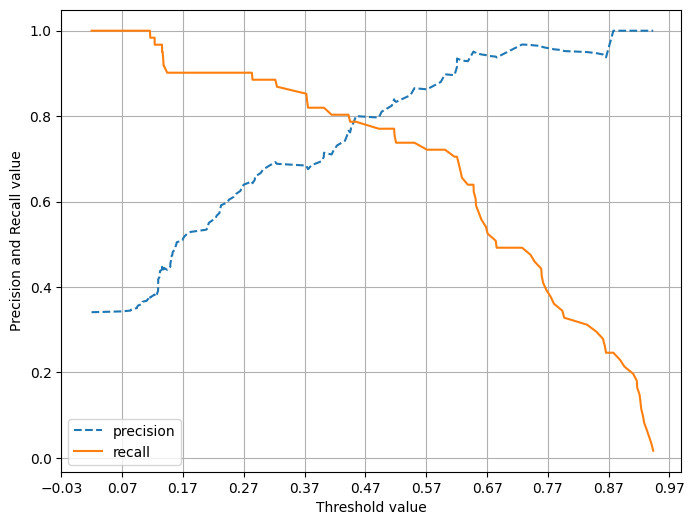

In [17]:
# precision_recall_curve( )를 통한 재현율, 정밀도 임곗값별 변화 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

# 정밀도와 재현율의 맹점
임계값의 변경은 업무 환경에 맞게 두개의 수치를 상호 보완할 수 있는 수준에서 적용되어야함
*  정밀도가 100% 되는 방법
    *  확실한 기준이 되는 경우만 positive로 예측하고 나머지는 negative 로 예측
    * -> FP 가 0 이 되기에 정확도가 100%가 됨
*  재현율이 100%가 되는 방법
    *  모든 환자를 positive 로 예측하면 된다.
    *  -> FN 이 0 이 되기에 재현율이 100%가 됨

# F1 스코어
정밀도와 재현율을 결합한 지표, F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐


In [18]:
# 타이타닉 생존자 모델의 F1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [19]:
# 임계값이 0.4 , 0.45 , 0.50 , 0.55 , 0.60 일때의 오차행렬, 정확도, 정밀도, 재현율, F1 스코어 반환
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 임곗값이 0.6일때 F1 스코어가 제일 좋음

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


# ROC 곡선과 AUC
ROC 곡선: 수신자 판단 곡선. FPR 이 변할때 TPR이 어떻게 변화하는지 나타내는 곡선-> 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것을 의미.


*   TPR: 민감도, Positive가 정확히 예측되어야 하는 수준을 나타냄
    *  TN/(FP + TN)
*   FPR: 특이성, Negative 가 정확히 예측되어야 하는 수준을 나타냄
    *  FP/(FP + TN) = 1 - TPR

*   ROC 곡선은 FPR을 0~1까지 변화시키면서 TPR의 변화값을 구함
    *  FPR 0 만들기: 임곗값을 1로 지정 -> FP 가 0 이 되기에 FPR 은 0이 된다
    *  FPR 1 만들기: TN 을 0으로 만들면 된다 -> 임계값을 0으로 설정

**ROC 곡선을 구하기 위한 roc_curver() api**
*  입력 파라미터
    *  y_true: 실제 클래스 값 array
    *  y_score: predict_proba()의 반환값에서 positive 칼럼의 예측확률 (2번째 열)
*  반환 값
    *  fpr: fpr 값을 array로 반환
    *  tpr: tpr 값을 array로 반환
    *  thresholds: threshold값 array

In [20]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


In [24]:
# 레이블 값이 1일때의 예측 확률을 추출
print(pred_proba_class1)

[0.55064773 0.13664488 0.13570355 0.1503148  0.17656589 0.15768776
 0.1290451  0.72771397 0.21814871 0.66814006 0.13821236 0.12941901
 0.13574048 0.12934055 0.43966454 0.14996976 0.11045826 0.25749268
 0.28879775 0.76223726 0.24315893 0.37571831 0.15344752 0.17288742
 0.1317437  0.22996172 0.17053651 0.0966387  0.26627952 0.31152612
 0.92353131 0.7746788  0.12838059 0.75924584 0.37288266 0.22996172
 0.09445724 0.59397424 0.06956414 0.12349478 0.30202577 0.10335406
 0.78006622 0.6843429  0.62057771 0.62067108 0.9283872  0.44222428
 0.92085513 0.13196917 0.4920994  0.12934055 0.14423594 0.6512987
 0.28441583 0.21146798 0.2538079  0.13570998 0.15920996 0.40161937
 0.26467919 0.11294402 0.45447199 0.44673659 0.37416474 0.11636721
 0.64818744 0.60096648 0.91699187 0.14927476 0.13221179 0.16929075
 0.12350957 0.94040086 0.21264241 0.12934055 0.283459   0.20840196
 0.79696903 0.13570998 0.7599495  0.62876418 0.91630375 0.15981388
 0.92233282 0.91026752 0.15276922 0.13758468 0.83460272 0.12934

In [27]:
print(fprs)

[0.         0.         0.         0.         0.         0.00847458
 0.00847458 0.01694915 0.01694915 0.02542373 0.02542373 0.02542373
 0.04237288 0.04237288 0.05932203 0.05932203 0.07627119 0.07627119
 0.10169492 0.10169492 0.12711864 0.12711864 0.16949153 0.16949153
 0.20338983 0.20338983 0.25423729 0.25423729 0.3220339  0.34745763
 0.55932203 0.57627119 0.59322034 0.59322034 0.60169492 0.60169492
 0.61016949 0.61864407 0.66101695 0.6779661  0.69491525 0.74576271
 0.77966102 0.8220339  0.8220339  0.84745763 0.84745763 1.        ]


In [31]:
print(thresholds) #-> 첫번째 값이 1보다 큰값 따라서 [1] 부터 시작
# 모든 샘플을 양성으로 분류하기 위한 설정으로 roc 곡선이 0,0 부터 시작할 수 있기 위해 1번째 값이 큰 값으로 반환됨

[1.94326279 0.94326279 0.94040086 0.93261004 0.87778554 0.86565305
 0.72771397 0.68584876 0.64779432 0.63856712 0.626297   0.62067108
 0.61651658 0.60096648 0.57135185 0.55064773 0.52051722 0.51724751
 0.4920994  0.45447199 0.4449725  0.44222428 0.41445141 0.40194454
 0.37571831 0.32202997 0.28441583 0.283459   0.23280097 0.22996172
 0.14927476 0.14927301 0.14423594 0.13866562 0.13821236 0.13664488
 0.13574048 0.13570998 0.13196917 0.1317437  0.12941901 0.12934055
 0.1290451  0.12350957 0.12349478 0.11636721 0.11573102 0.01974988]


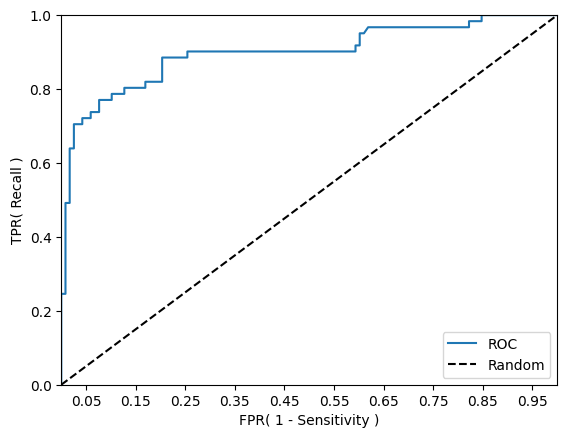

In [23]:
# roc 곡선 시각화
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

### AUC
성능지표로 사용되는 ROC 곡선 면적에 기반한 AUC 값으로 결정됨. -> 일반적으로 1에 가까울 수록 좋은 수치, 가장 안좋은 수치는 0.5


In [21]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [33]:
# roc_auc_score()를 이용하여 ROC AUC 측정하는 로직 추가, y_test와 pred_proba를 인자로 받아, 모델의 ROC AUC 값을 계산.

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

#피마 인디언 당뇨병 예측

In [34]:
#피마 인디언 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

    # negative 값이 상대적으로 많음

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [35]:
# 데이터 정보 확인하기
diabetes_data.info( )
    # null 값은 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1] # 마지막 열을 제외한 모든 열
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,          F1: 0.6465, AUC:0.8083


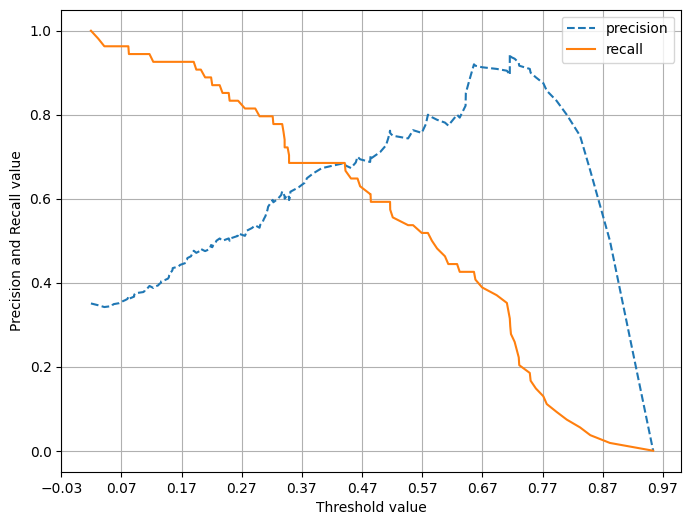

In [38]:
#정밀도-재현율 곡선 그리기
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1] # -> 각 데이터가 Positive 에 속할 확률
precision_recall_curve_plot(y_test, pred_proba_c1)

임계값을 0.42 정도로 맞추면 되지만 그래도 두 지표의 값이 낮기에 데이터 값을 다시 점검

In [47]:
diabetes_data.describe() # -> 시리즈 객체의 요약통계 제공
    # 0 값을 min 으로 가지고 있는 피처 발견

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


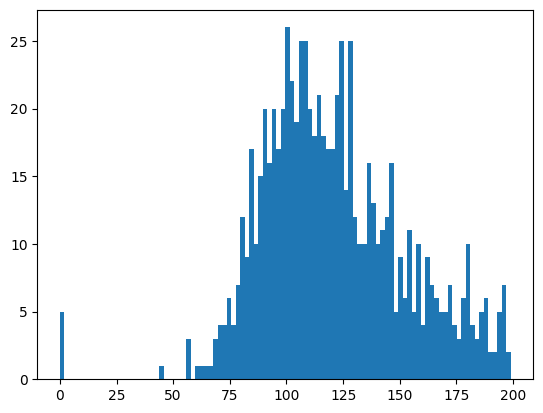

In [40]:
# Glucose 피처 값의 분포도 -> 0값으로 가지고 있는 데이터 5개 발견
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [41]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


Insulin, SkinThickness 피처는 0 값이 전체 데이터늬 48.7%, 29.56% 로 상당히 많음 -> 0 값을 평균값으로 대체

In [42]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features) # 0 데이터를 mean_zero_features에 있는 각 피처별 평균값으로 대체

In [43]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

    # 이후 다시 평가를 해보면, 성능수치가 일정 수준으로 개선이 되었음

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,          F1: 0.6804, AUC:0.8433


In [48]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,          F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,          F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,          F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,          F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,          F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,          F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,          F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,          F1: 0.6804, AUC:0.8433


임곗값이 0.48일때 f1 스코어도 가장 높으며, 재현유르, 정밀도 수치도 조화로움 -? 임곗값을 0.48로 낮춘 상태에서 다시 로지스틱 회귀모델을 이용해 예측 진행

In [46]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,          F1: 0.6931, AUC:0.8433
